# **Enron Email Dataset Analysis: A Comprehensive Exploration of NLP, Social Network Insights, and Sentiment Analysis**
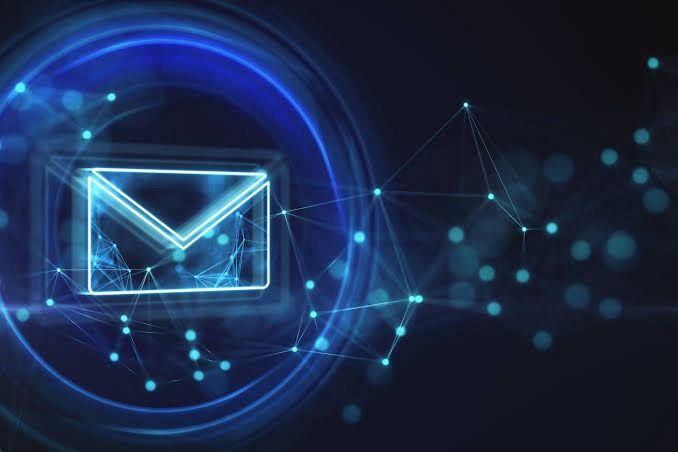

# ▶**Student Details:**


## **Group Id:** 13
##**Group Name:**   DATA DECODERS

###**GROUP MEMBERS:**

A015_SERENA_DMELLO

A017_SANIYA_FARGOSE

A069_HARSH_TANTAK


# **▶INTRODUCTION TO DATASET:**

The Enron Email Dataset is a large collection of emails from employees of the Enron Corporation, made public after the company’s financial scandal and bankruptcy in 2001. It is one of the most well-known datasets for NLP and machine learning research, especially in areas like email classification, fraud detection, and social network analysis.

**Key Features of the Dataset:**

📧 Size: Over 500,000 emails from 150+ employees.

🏢 Source: Enron Corporation, a former American energy and commodities company.

📁 Structure: Organized into folders (Inbox, Sent Items, Drafts, etc.) for different employees.

🔍 Data Fields:Sender,Receiver(s) (To, CC, BCC),Subject,Email body,Timestamp

This project explores the Enron Email Dataset using various methods, including:

#### 1. **Exploratory Data Analysis (EDA)**
   - Analyze the structure and distribution of emails (folders, senders, receivers).
   - Identify trends like email frequency, active users, and communication patterns.

#### 2. **Social Network Analysis (SNA)**
   - Map relationships and interactions between employees based on email exchanges.
   - Identify key individuals, communication clusters, and influential figures.

#### 3. **Natural Language Processing (NLP)**
   - Apply NLP techniques to extract themes and topics from email text.
   - Use methods like topic modeling to uncover the primary subjects of communication.

#### 4. **Sentiment Analysis**
   - Analyze the emotional tone of email subjects and body content (positive, negative, neutral).
   - Understand the overall sentiment of communication within the organization.

#### 5. **Emotional Analysis**
   - Detect specific emotions (e.g., anger, joy, frustration) expressed in emails.
   - Gain insights into the emotional dynamics and internal atmosphere at Enron.

These methods provide insights into communication behaviors, emotional dynamics, and organizational structure at Enron.



# **Data Loading :**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from nltk.tokenize import RegexpTokenizer
from subprocess import check_output

# Set seaborn style
sns.set_style('whitegrid')

# Check if running in Google Colab and mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset directory (change path if necessary)
input_dir = "/content/drive/My Drive/Colab Notebooks"  # Adjust this path

# Check if the dataset directory exists
if os.path.exists(input_dir):
    print("Available files:", os.listdir(input_dir))
else:
    print(f"Error: The directory '{input_dir}' does not exist.")

# Optional: Install missing libraries
!pip install wordcloud nltk networkx --quiet

# Example: Load a CSV file if available
csv_files = [f for f in os.listdir(input_dir) if f.endswith('.csv')]
if csv_files:
    file_path = os.path.join(input_dir, csv_files[0])
    emails_df = pd.read_csv(file_path)
    print("emails.csv", emails_df.head())
else:
    print("No CSV files found in the dataset folder.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Available files: ['emails.csv', 'Untitled0.ipynb', 'Day 1 - Datatypes .ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Api_processing.ipynb', 'Untitled4.ipynb', 'UNMATCHED_PATIENTS(in).csv', 'DecodeX_orion', 'UNMATCHED_PATIENTS(out).csv', 'UNMATCHED_PATIENTS_new.csv', 'updated_dataset.csv', 'updated_dataset_final.csv', 'Final_dataset.csv', 'Orion_Non-randomized_data.ipynb', 'updated_dataset_with_severity.csv', 'Dalmia_1.ipynb', 'Orion_Prashant2.ipynb', 'Final_note_dalmia.ipynb', 'FA_DATA.csv', 'Untitled5.ipynb', 'PCA_AMA_practical.ipynb', 'Untitled6.ipynb', 'MLT_Assignment.ipynb', 'Untitled7.ipynb']
emails.csv                        file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e..

In [ ]:
print(emails_df['message'][0])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


# **Data Pre Processing :**
For preprocessing we start by splitting the text into emails which will be used as main index column for extraction

In [ ]:
## Helper functions
def get_text_from_email(msg):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    else:
        addrs = None
    return addrs

In [ ]:
import email
# Parse the emails into a list email objects
messages = list(map(email.message_from_string, emails_df['message']))
emails_df.drop('message', axis=1, inplace=True)
# Get fields from parsed email objects
keys = messages[0].keys()
for key in keys:
    emails_df[key] = [doc[key] for doc in messages]
# Parse content from emails
emails_df['content'] = list(map(get_text_from_email, messages))
# Split multiple email addresses
emails_df['From'] = emails_df['From'].map(split_email_addresses)
emails_df['To'] = emails_df['To'].map(split_email_addresses)

# Extract the root of 'file' as 'user'
emails_df['user'] = emails_df['file'].map(lambda x:x.split('/')[0])
del messages

emails_df.head()

,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",(phillip.allen@enron.com),(tim.belden@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",(phillip.allen@enron.com),(john.lavorato@enron.com),Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",(phillip.allen@enron.com),(leah.arsdall@enron.com),Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",(phillip.allen@enron.com),(randall.gay@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",(phillip.allen@enron.com),(greg.piper@enron.com),Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p


In [ ]:
print('shape of the dataframe:', emails_df.shape)
# Find number of unique values in each columns
for col in emails_df.columns:
    print(col, emails_df[col].nunique())

shape of the dataframe: (517401, 18)
file 517401
Message-ID 517401
Date 224128
From 20328
To 54748
Subject 159290
Mime-Version 1
Content-Type 2
Content-Transfer-Encoding 3
X-From 27980
X-To 73552
X-cc 33701
X-bcc 132
X-Folder 5335
X-Origin 259
X-FileName 429
content 249025
user 150


In [ ]:
# Set index and drop columns with two few values
emails_df = emails_df.set_index('Message-ID')\
    .drop(['file', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding'], axis=1)
# Parse datetime
emails_df['Date'] = pd.to_datetime(emails_df['Date'],  errors='coerce')
# Drop rows with invalid dates
emails_df = emails_df.dropna(subset=['Date'])
emails_df.dtypes

<ipython-input-11-9200403a5cdd>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  emails_df['Date'] = pd.to_datetime(emails_df['Date'],  errors='coerce')
<ipython-input-11-9200403a5cdd>:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  emails_df['Date'] = pd.to_datetime(emails_df['Date'],  errors='coerce')


,0
Date,object
From,object
To,object
Subject,object
X-From,object
X-To,object
X-cc,object
X-bcc,object
X-Folder,object
X-Origin,object


# ▶**EDA:**

<ipython-input-13-bc211b056c81>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  emails_df['Date'] = pd.to_datetime(emails_df['Date'], infer_datetime_format=True, errors='coerce')


Text(0, 0.5, 'N emails')

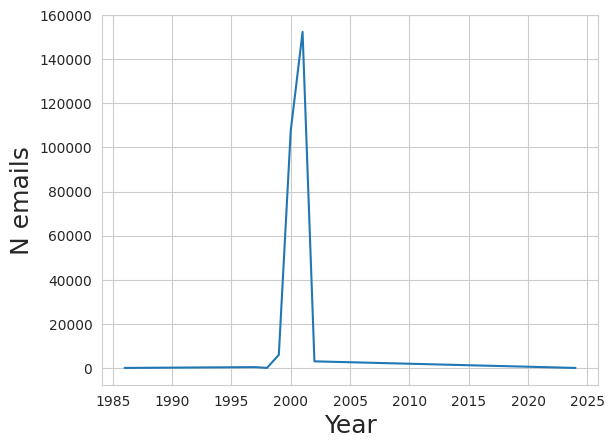

In [ ]:
# Parse datetime
emails_df['Date'] = pd.to_datetime(emails_df['Date'], infer_datetime_format=True, errors='coerce')
# Drop rows with invalid dates
emails_df = emails_df.dropna(subset=['Date'])

ax = emails_df.groupby(emails_df['Date'].dt.year)['content'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

Text(0, 0.5, 'N emails')

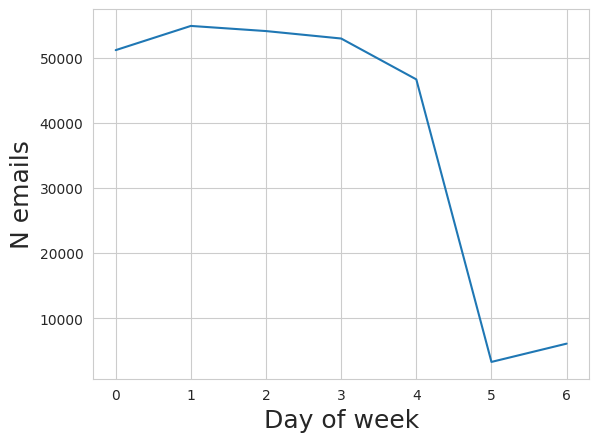

In [ ]:
ax = emails_df.groupby(emails_df['Date'].dt.dayofweek)['content'].count().plot()
ax.set_xlabel('Day of week', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

Text(0, 0.5, 'N emails')

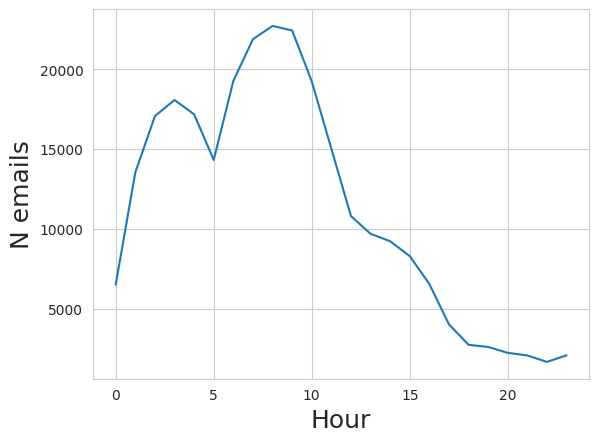

In [ ]:
ax = emails_df.groupby(emails_df['Date'].dt.hour)['content'].count().plot()
ax.set_xlabel('Hour', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)


# **Who sends most emails?**

In [ ]:
# Count words in Subjects and content
tokenizer = RegexpTokenizer(r'(?u)\b\w\w+\b')
emails_df['subject_wc'] = emails_df['Subject'].map(lambda x: len(tokenizer.tokenize(x)))
emails_df['content_wc'] = emails_df['content'].map(lambda x: len(tokenizer.tokenize(x)))

In [ ]:

grouped_by_people = emails_df.groupby('user').agg({
        'content': 'count',
        'subject_wc': 'mean',
        'content_wc': 'mean',
    })
grouped_by_people.rename(columns={'content': 'N emails',
                                  'subject_wc': 'Subject word count',
                                  'content_wc': 'Content word count'}, inplace=True)
grouped_by_people.sort_index(level=['N emails'], ascending=False).head() # Use sort_index and specify the level

,N emails,Subject word count,Content word count
user,,,
zufferli-j,205,4.341463,172.643902
zipper-a,919,4.755169,173.007617
ybarbo-p,910,5.157143,361.316484
wolfe-j,957,4.682341,215.734587
williams-w3,1730,5.073410,186.803468


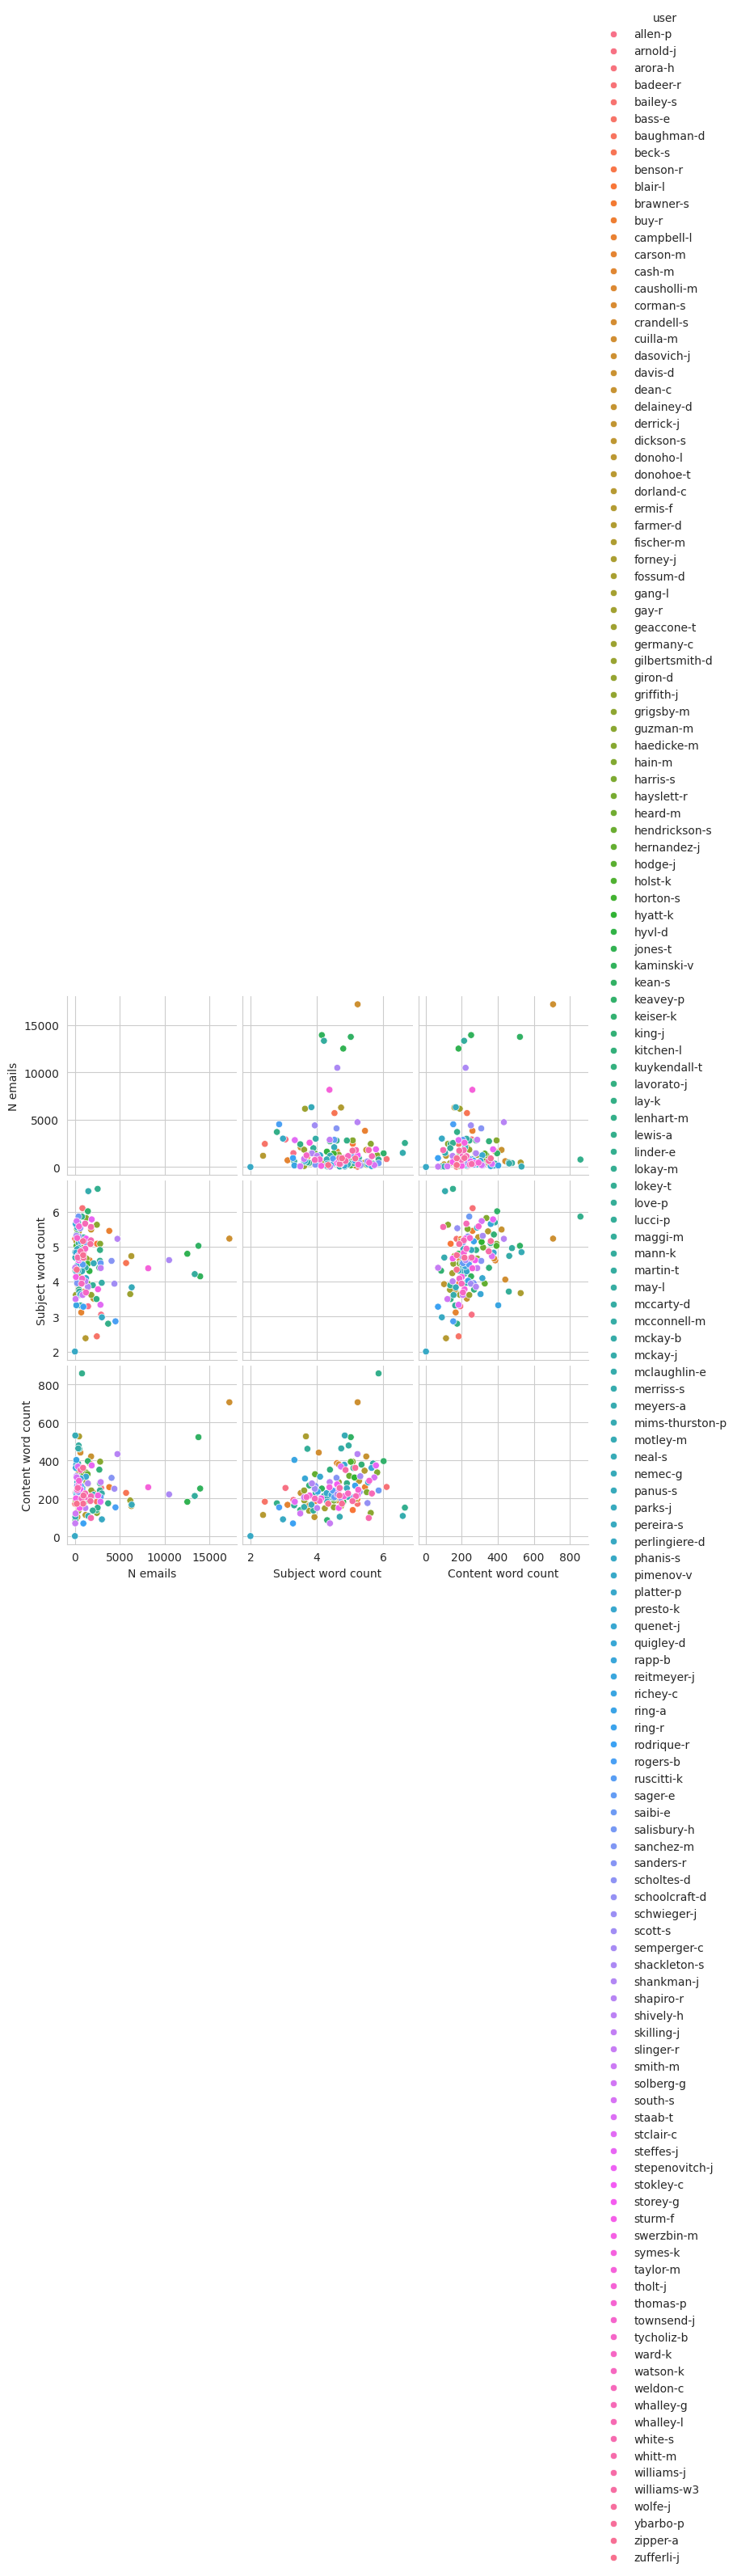

In [ ]:
sns.pairplot(grouped_by_people.reset_index(), hue='user')


# **Social network analyses (SNA) of email senders and recipients**
Let's see who sends the most emails to whom
First we'll only look at emails sent to single email address, which may be more important personal communications

In [ ]:
sub_df = emails_df[['From', 'To', 'Date']].dropna()
print(sub_df.shape)
sub_df
# drop emails sending to multiple addresses
sub_df = sub_df.loc[sub_df['To'].map(len) == 1]
print(sub_df.shape)
sub_df

(254560, 3)
(181124, 3)


,From,To,Date
Message-ID,,,
<18782981.1075855378110.JavaMail.evans@thyme>,(phillip.allen@enron.com),(tim.belden@enron.com),2001-05-14 16:39:00-07:00
<15464986.1075855378456.JavaMail.evans@thyme>,(phillip.allen@enron.com),(john.lavorato@enron.com),2001-05-04 13:51:00-07:00
<24216240.1075855687451.JavaMail.evans@thyme>,(phillip.allen@enron.com),(leah.arsdall@enron.com),2000-10-18 03:00:00-07:00
<13505866.1075863688222.JavaMail.evans@thyme>,(phillip.allen@enron.com),(randall.gay@enron.com),2000-10-23 06:13:00-07:00
<30922949.1075863688243.JavaMail.evans@thyme>,(phillip.allen@enron.com),(greg.piper@enron.com),2000-08-31 05:07:00-07:00
...,...,...,...
<21421443.1075842036548.JavaMail.evans@thyme>,(john.zufferli@enron.com),(john.lavorato@enron.com),2001-06-13 06:33:06-07:00
<24698305.1075842036573.JavaMail.evans@thyme>,(john.zufferli@enron.com),(robert.hemstock@enron.com),2001-06-13 05:54:39-07:00
<21594812.1075842036620.JavaMail.evans@thyme>,(john.zufferli@enron.com),(kimberly.hillis@enron.com),2001-06-12 11:52:45-07:00


In [ ]:
sub_df = sub_df.groupby(['From', 'To']).count().reset_index()
# Unpack frozensets
sub_df['From'] = sub_df['From'].map(lambda x: next(iter(x)))
sub_df['To'] = sub_df['To'].map(lambda x: next(iter(x)))
# rename column
sub_df.rename(columns={'Date': 'count'}, inplace=True)
sub_df.sort_values('count', ascending=False).head(10)

,From,To,count
9851,pete.davis@enron.com,pete.davis@enron.com,4995
24115,vince.kaminski@enron.com,vkaminski@aol.com,1934
18315,enron.announcements@enron.com,all.worldwide@enron.com,1199
18310,enron.announcements@enron.com,all.houston@enron.com,1076
18007,soblander@carrfut.com,soblander@carrfut.com,804
26853,kay.mann@enron.com,suzanne.adams@enron.com,742
24117,vince.kaminski@enron.com,shirley.crenshaw@enron.com,593
10886,steven.kean@enron.com,maureen.mcvicker@enron.com,578
18267,office.chairman@enron.com,all.worldwide@enron.com,405
26825,kay.mann@enron.com,kathleen.carnahan@enron.com,381


**#COMMENT:**

Apparently some people send a lot of emails to themselves. It maybe very interesting to look at the differences between emails sent to selves and to others.

In [ ]:
# Make a network of email sender and receipients
G = nx.from_pandas_edgelist(sub_df, 'From', 'To', edge_attr='count', create_using=nx.DiGraph())
print('Number of nodes: %d, Number of edges: %d' % (G.number_of_nodes(), G.number_of_edges()))

Number of nodes: 15340, Number of edges: 32396


Text(0.5, 0, 'Out-degrees')

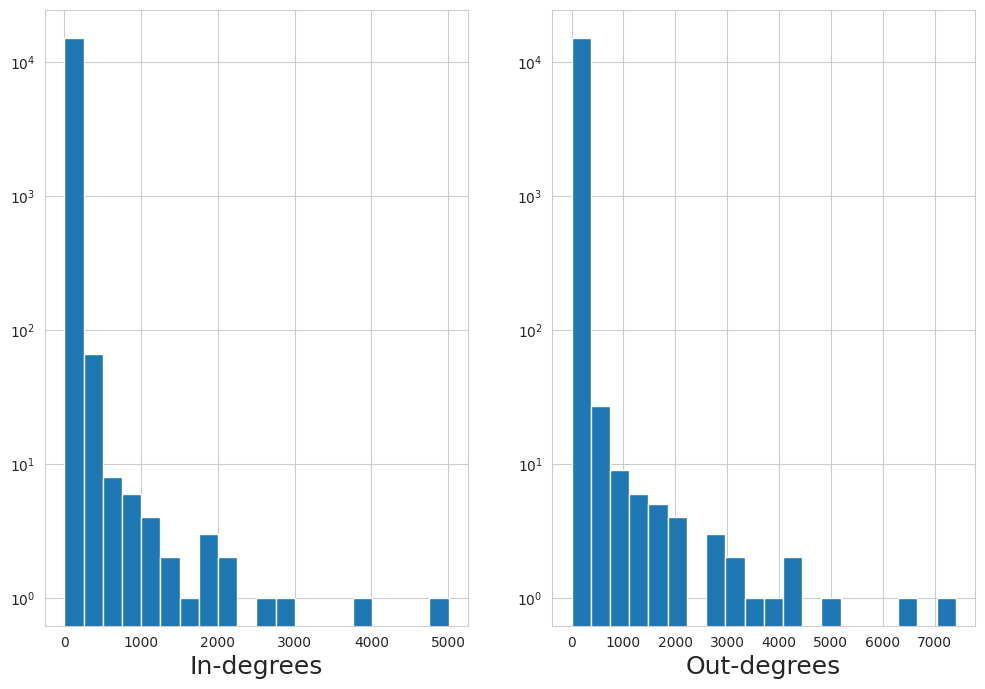

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 8))
# Get the in-degree values as a list using a list comprehension
in_degrees = [degree for node, degree in G.in_degree(weight='count')]
ax1.hist(in_degrees, log=True, bins=20) # Pass the in-degrees list
ax1.set_xlabel('In-degrees', fontsize=18)

# Do the same for out-degrees
out_degrees = [degree for node, degree in G.out_degree(weight='count')]
ax2.hist(out_degrees, log=True, bins=20) # Pass the out-degrees list
ax2.set_xlabel('Out-degrees', fontsize=18)

**#COMMENT:**

The degree distribution in the network appears to be scale-free, as indicated by the few nodes with high in-degrees and out-degrees, while most nodes have low values. This follows a power-law distribution, typical of many real-world networks, where a small number of nodes are highly connected, and the majority have fewer connections.



### **Distribution of Nodes in Connected Components (Log Scale)**

(0.1, 10000.0)

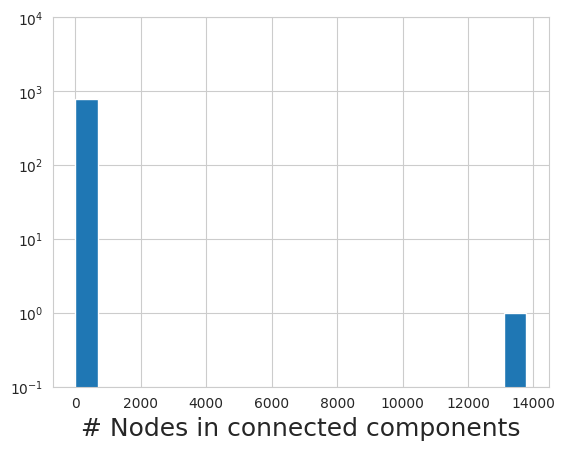

In [ ]:
n_nodes_in_cc = []
for nodes in nx.connected_components(G.to_undirected()):
    n_nodes_in_cc.append(len(nodes))

plt.hist(n_nodes_in_cc, bins=20, log=True)
plt.xlabel('# Nodes in connected components', fontsize=18)
plt.ylim([.1,1e4])

## **Word Cloud Visualization of Email Subjects :**

(-0.5, 799.5, 599.5, -0.5)

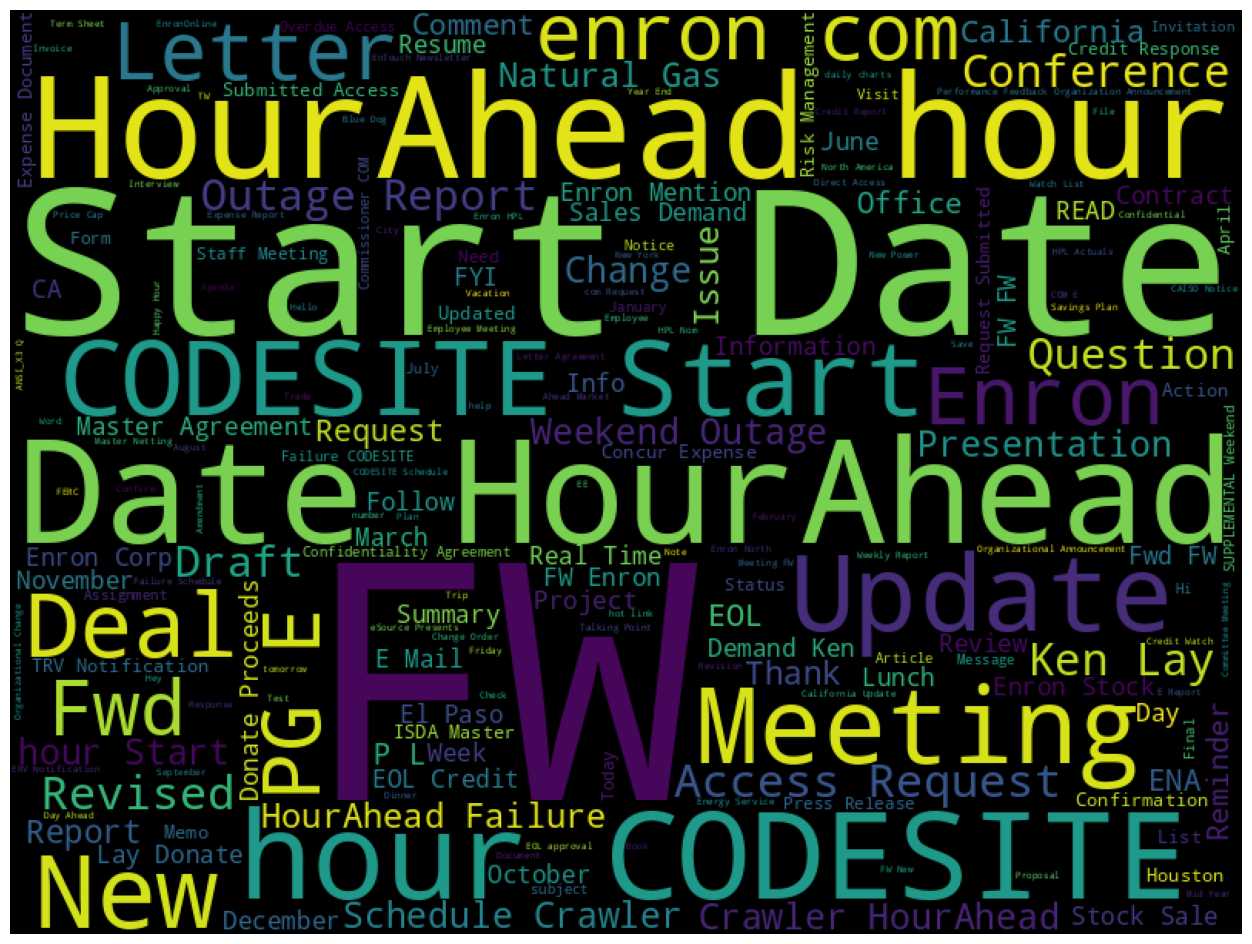

In [ ]:
!pip install wordcloud
import wordcloud
from sklearn.feature_extraction import _stop_words

# ... your existing code ...

subjects = ' '.join(emails_df['Subject'])
fig, ax = plt.subplots(figsize=(16, 12))
# Use _stop_words.ENGLISH_STOP_WORDS instead of the old import
wc = wordcloud.WordCloud(width=800,
                         height=600,
                         max_words=200,
                         stopwords=_stop_words.ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

(-0.5, 799.5, 599.5, -0.5)

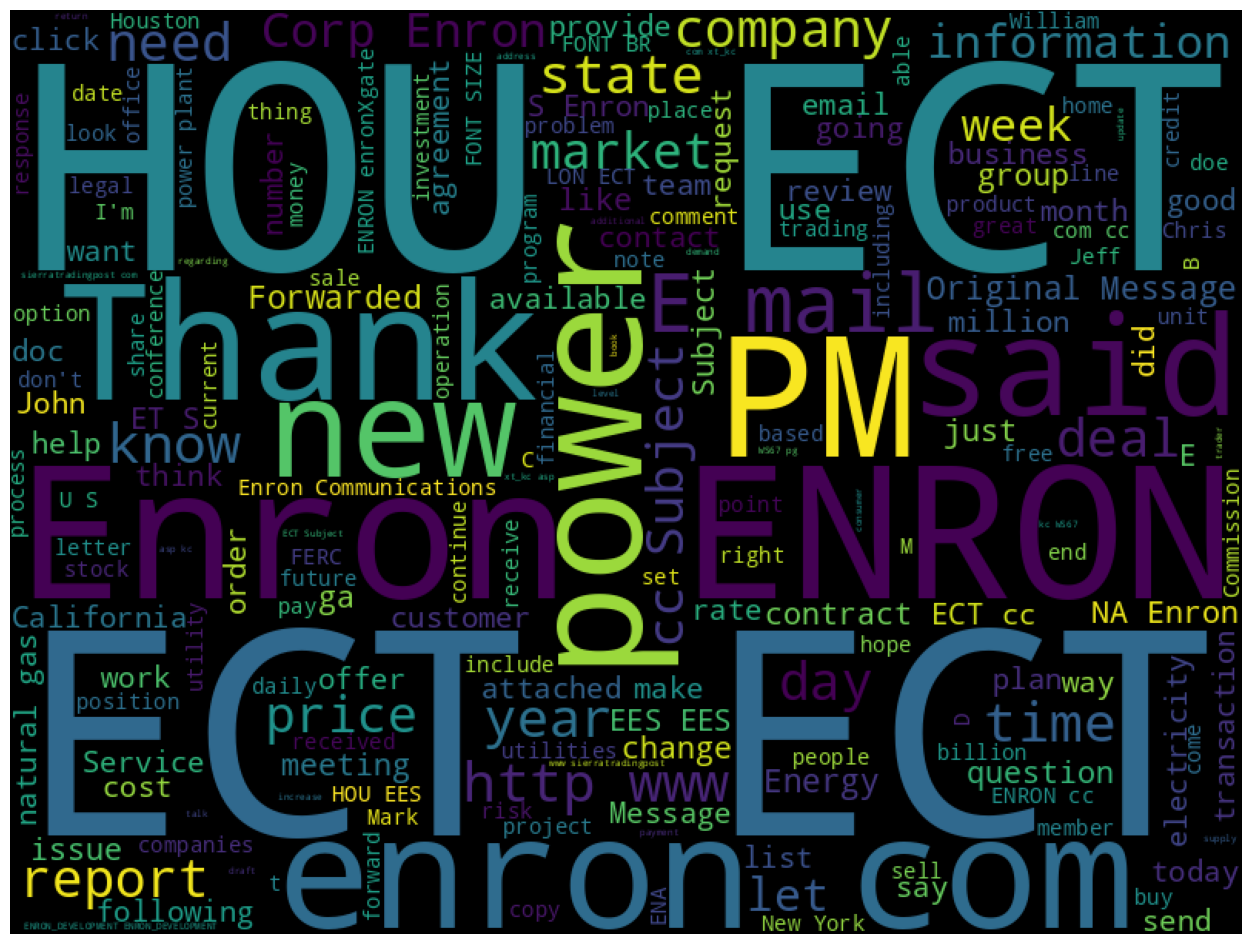

In [ ]:
contents = ' '.join(emails_df.sample(1000)['content'])
fig, ax = plt.subplots(figsize=(16, 12))
# Instead of ENGLISH_STOP_WORDS, use _stop_words.ENGLISH_STOP_WORDS
wc = wordcloud.WordCloud(width=800,
                         height=600,
                         max_words=200,
                         stopwords=_stop_words.ENGLISH_STOP_WORDS).generate(contents)  # Changed here
ax.imshow(wc)
ax.axis("off")

# **Sentiment Analysis**


## **Data Loading for Sentiment Analysis**

In [ ]:
#Loading libraries
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
import email
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Colab Notebooks/emails.csv"
df = pd.read_csv(file_path)

Mounted at /content/drive


## **Data Pre Processing for Sentiment Analysis**

In [ ]:
# create list of email objects
emails = list(map(email.parser.Parser().parsestr,df['message']))

# extract headings such as subject, from, to etc..
headings  = emails[0].keys()

# Goes through each email and grabs info for each key
# doc['From'] grabs who sent email in all emails
for key in headings:
    df[key] = [doc[key] for doc in emails]

In [ ]:
df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf


In [ ]:
##Useful functions
def get_raw_text(emails):
    email_text = []
    for email in emails.walk():
        if email.get_content_type() == 'text/plain':
            email_text.append(email.get_payload())
    return ''.join(email_text)

df['body'] = list(map(get_raw_text, emails))
df.head()
df['user'] = df['file'].map(lambda x: x.split('/')[0])

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

<ipython-input-7-fc1fe06f0809>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-7-fc1fe06f0809>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


,0
file,object
message,object
Message-ID,object
Date,object
From,object
To,object
Subject,object
Mime-Version,object
Content-Type,object
Content-Transfer-Encoding,object


In [ ]:

import re

def clean_column(data):
    if data is not None:
        stopwords_list = stopwords.words('english')
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
        data =  data.lower()
        data = re.sub('re:', '', data)
        data = re.sub('-', '', data)
        data = re.sub('_', '', data)
        # Remove data between square brackets
        data =re.sub('\[[^]]*\]', '', data)
        # removes punctuation
        data = re.sub(r'[^\w\s]','',data)
        data = re.sub(r'\n',' ',data)
        data = re.sub(r'[0-9]+','',data)
        # strip html
        p = re.compile(r'<.*?>')
        data = re.sub(r"\'ve", " have ", data)
        data = re.sub(r"can't", "cannot ", data)
        data = re.sub(r"n't", " not ", data)
        data = re.sub(r"I'm", "I am", data)
        data = re.sub(r" m ", " am ", data)
        data = re.sub(r"\'re", " are ", data)
        data = re.sub(r"\'d", " would ", data)
        data = re.sub(r"\'ll", " will ", data)
        data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
        data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)

        data = p.sub('', data)
        if 'forwarded by:' in data:
            data = data.split('subject')[1]
        data = data.strip()
        return data
    return 'No Subject'


df['Subject_new'] = df['Subject'].apply(clean_column)
df['body_new'] = df['body'].apply(clean_column)


In [ ]:
df['body_new'].head(5)

,body_new
0,here is our forecast
1,traveling to have a business meeting takes the...
2,test successful way to go
3,randy can you send me a schedule of the sala...
4,lets shoot for tuesday at


In [ ]:
df['Subject_new'].tail(5)

,Subject_new
517396,trade with john lavorato
517397,gas hedges
517398,confidential
517399,calgary analystassociate
517400,alis essays


In [ ]:
#Shape of dataframe
print(" Shape of training dataframe: ", df['body_new'].shape)

 Shape of training dataframe:  (517401,)


In [ ]:
# Drop duplicates
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (517401, 21)


In [ ]:
#Null values

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})

print ("Null Values in each column:\n", missing_data)

Null Values in each column:
                   column name  Total missing  Percent missing
0                          To          21847         0.042225
1   Content-Transfer-Encoding             29         0.000056
2                Content-Type             29         0.000056
3                Mime-Version             29         0.000056
4                        X-To             29         0.000056
5                    X-Origin             29         0.000056
6                    X-Folder             29         0.000056
7                  X-FileName             29         0.000056
8                       X-bcc             29         0.000056
9                        X-cc             29         0.000056
10                     X-From             29         0.000056
11                       file              0         0.000000
12                    message              0         0.000000
13                       From              0         0.000000
14                       Date            

# **Sentiment Analysis**

In [ ]:
!pip install vaderSentiment
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.6 MB/s eta 0:00:00


In [ ]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [ ]:
#testing the function
email  = "I would love to watch the magic show again"
email2 = "What the hell they have made. Pathetic!"
email3 = " I do not know what to do"
print (sentiment_analyzer_score(email))
print (sentiment_analyzer_score(email2))
print (sentiment_analyzer_score(email3))

I would love to watch the magic show again {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
None
What the hell they have made. Pathetic!- {'neg': 0.632, 'neu': 0.368, 'pos': 0.0, 'compound': -0.8622}
None
 I do not know what to do--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None


In [ ]:
# prompt: take sample of df having 50% of df data

# Assuming 'emails_df' is your DataFrame
sampled_df = df.sample(frac=0.05, random_state=42)  # 50% sample, random_state for reproducibility
sampled_df.shape


(25870, 21)

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = sampled_df['body_new'].apply(tokenizer.tokenize)
words_descriptions.head()

,body_new
427616,"[bill, thanks, for, the, info, i, also, spoke,..."
108773,"[aimee, please, check, meter, lamay, gas, lift..."
355471,"[gcca, crawfish, and, ripoff, raffle, overpric..."
457837,"[keonizip, chris, per, your, request, here, ar..."
124910,"[im, trying, to, change, the, receipt, meter, ..."


In [ ]:
all_words = [word for tokens in words_descriptions for word in tokens]
sampled_df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

6526824 words total, with a vocabulary size of 157924


In [ ]:
# Checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(10)

[('the', 295222),
 ('to', 207142),
 ('and', 132461),
 ('of', 123739),
 ('a', 104460),
 ('in', 91434),
 ('for', 74643),
 ('on', 63057),
 ('is', 62672),
 ('you', 57466),
 ('that', 55839),
 ('i', 49732),
 ('this', 45390),
 ('be', 43537),
 ('with', 39628),
 ('from', 37952),
 ('will', 37825),
 ('at', 36325),
 ('have', 35809),
 ('by', 35660),
 ('we', 34268),
 ('are', 33358),
 ('it', 32781),
 ('as', 32545),
 ('or', 29020),
 ('enron', 26832),
 ('not', 25170),
 ('if', 25007),
 ('am', 24474),
 ('your', 24018),
 ('subject', 22502),
 ('pm', 21580),
 ('an', 19529),
 ('please', 19259),
 ('has', 18645),
 ('would', 17510),
 ('was', 17256),
 ('email', 16419),
 ('all', 16174),
 ('power', 16076),
 ('any', 16034),
 ('its', 15337),
 ('energy', 15226),
 ('our', 15127),
 ('cc', 15093),
 ('me', 14780),
 ('but', 14318),
 ('new', 14281),
 ('can', 14035),
 ('said', 13895),
 ('he', 13875),
 ('message', 12276),
 ('they', 11942),
 ('may', 11533),
 ('more', 11229),
 ('about', 11053),
 ('which', 10998),
 ('do', 10741

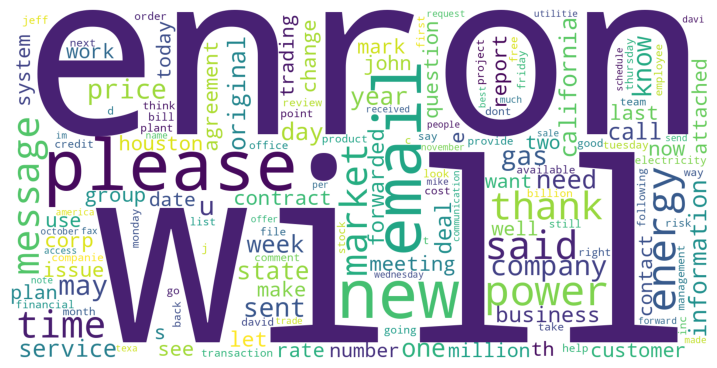

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
to_add = ['FW', 'ga', 'httpitcappscorpenroncomsrrsauthemaillinkaspidpage', 'cc', 'aa', 'aaa', 'aaaa',
         'hou', 'cc', 'etc', 'subject', 'pm']

for i in to_add:
    stopwords.add(i)

#Visualise Email Subject

wordcloud = WordCloud(
                          collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40,
                          random_state=42
                         ).generate(' '.join(sampled_df['body_new'])) # can't pass a series, needs to be strings and function computes frequencies
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
sampled_df['scores'] = sampled_df['body_new'].apply(lambda review: analyser.polarity_scores(review))
sampled_df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-bcc,X-Folder,X-Origin,X-FileName,body,user,Subject_new,body_new,description_lengths,scores
427616,shackleton-s/sent/1912.,Message-ID: <21013688.1075844564560.JavaMail.e...,<21013688.1075844564560.JavaMail.evans@thyme>,2000-08-29 01:26:00-07:00,sara.shackleton@enron.com,william.bradford@enron.com,Re: Credit Derivatives,1.0,text/plain; charset=us-ascii,7bit,...,,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,SHACKLETON-S,sshackle.nsf,Bill: Thanks for the info. I also spoke wit...,shackleton-s,credit derivatives,bill thanks for the info i also spoke with ...,264,"{'neg': 0.036, 'neu': 0.801, 'pos': 0.163, 'co..."
108773,farmer-d/logistics/1066.,Message-ID: <22688499.1075854130303.JavaMail.e...,<22688499.1075854130303.JavaMail.evans@thyme>,2000-04-24 05:43:00-07:00,pat.clynes@enron.com,aimee.lannou@enron.com,Meter #1591 Lamay Gaslift,1.0,text/plain; charset=us-ascii,7bit,...,,\Darren_Farmer_Dec2000\Notes Folders\Logistics,Farmer-D,dfarmer.nsf,"Aimee,\nPlease check meter #1591 Lamay gas lif...",farmer-d,meter lamay gaslift,aimee please check meter lamay gas lift it d...,32,"{'neg': 0.111, 'neu': 0.824, 'pos': 0.065, 'co..."
355471,parks-j/deleted_items/202.,Message-ID: <27817771.1075841359502.JavaMail.e...,<27817771.1075841359502.JavaMail.evans@thyme>,2002-05-02 04:54:27-07:00,knipe3@msn.com,"fenner.chet@enron.com, joe.parks@enron.com, co...",Re: man night again?,1.0,text/plain; charset=us-ascii,7bit,...,,"\ExMerge - Parks, Joe\Deleted Items",PARKS-J,joe parks 6-26-02.pst,GCCA Crawfish and rip-off raffle & over-priced...,parks-j,man night again,gcca crawfish and ripoff raffle overpriced pr...,537,"{'neg': 0.009, 'neu': 0.896, 'pos': 0.094, 'co..."
457837,stokley-c/chris_stokley/iso/client_rep/41.,Message-ID: <10695160.1075858510449.JavaMail.e...,<10695160.1075858510449.JavaMail.evans@thyme>,2001-08-08 14:35:08-07:00,kalmeida@caiso.com,chris.stokley@enron.com,"Enron 480, 1480 charges",1.0,text/plain; charset=us-ascii,7bit,...,,"\Stokley, Chris (Non-Privileged)\Chris Stokley...",Stokley-C,"Stokley, Chris (Non-Privileged).pst","<<Keoni.zip>> Chris, per your request here ar...",stokley-c,enron charges,keonizip chris per your request here are the ...,118,"{'neg': 0.05, 'neu': 0.883, 'pos': 0.068, 'com..."
124910,germany-c/all_documents/1174.,Message-ID: <27819143.1075853689038.JavaMail.e...,<27819143.1075853689038.JavaMail.evans@thyme>,2000-06-21 04:58:00-07:00,chris.germany@enron.com,thomas.engel@enron.com,Transport Deal,1.0,text/plain; charset=us-ascii,7bit,...,,\Chris_Germany_Dec2000\Notes Folders\All docum...,Germany-C,cgerman.nsf,I'm trying to change the Receipt Meter on deal...,germany-c,transport deal,im trying to change the receipt meter on deal ...,36,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
sampled_df['compound']  = sampled_df['scores'].apply(lambda score_dict: score_dict['compound'])

sampled_df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-Folder,X-Origin,X-FileName,body,user,Subject_new,body_new,description_lengths,scores,compound
427616,shackleton-s/sent/1912.,Message-ID: <21013688.1075844564560.JavaMail.e...,<21013688.1075844564560.JavaMail.evans@thyme>,2000-08-29 01:26:00-07:00,sara.shackleton@enron.com,william.bradford@enron.com,Re: Credit Derivatives,1.0,text/plain; charset=us-ascii,7bit,...,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,SHACKLETON-S,sshackle.nsf,Bill: Thanks for the info. I also spoke wit...,shackleton-s,credit derivatives,bill thanks for the info i also spoke with ...,264,"{'neg': 0.036, 'neu': 0.801, 'pos': 0.163, 'co...",0.9851
108773,farmer-d/logistics/1066.,Message-ID: <22688499.1075854130303.JavaMail.e...,<22688499.1075854130303.JavaMail.evans@thyme>,2000-04-24 05:43:00-07:00,pat.clynes@enron.com,aimee.lannou@enron.com,Meter #1591 Lamay Gaslift,1.0,text/plain; charset=us-ascii,7bit,...,\Darren_Farmer_Dec2000\Notes Folders\Logistics,Farmer-D,dfarmer.nsf,"Aimee,\nPlease check meter #1591 Lamay gas lif...",farmer-d,meter lamay gaslift,aimee please check meter lamay gas lift it d...,32,"{'neg': 0.111, 'neu': 0.824, 'pos': 0.065, 'co...",-0.1531
355471,parks-j/deleted_items/202.,Message-ID: <27817771.1075841359502.JavaMail.e...,<27817771.1075841359502.JavaMail.evans@thyme>,2002-05-02 04:54:27-07:00,knipe3@msn.com,"fenner.chet@enron.com, joe.parks@enron.com, co...",Re: man night again?,1.0,text/plain; charset=us-ascii,7bit,...,"\ExMerge - Parks, Joe\Deleted Items",PARKS-J,joe parks 6-26-02.pst,GCCA Crawfish and rip-off raffle & over-priced...,parks-j,man night again,gcca crawfish and ripoff raffle overpriced pr...,537,"{'neg': 0.009, 'neu': 0.896, 'pos': 0.094, 'co...",0.9915
457837,stokley-c/chris_stokley/iso/client_rep/41.,Message-ID: <10695160.1075858510449.JavaMail.e...,<10695160.1075858510449.JavaMail.evans@thyme>,2001-08-08 14:35:08-07:00,kalmeida@caiso.com,chris.stokley@enron.com,"Enron 480, 1480 charges",1.0,text/plain; charset=us-ascii,7bit,...,"\Stokley, Chris (Non-Privileged)\Chris Stokley...",Stokley-C,"Stokley, Chris (Non-Privileged).pst","<<Keoni.zip>> Chris, per your request here ar...",stokley-c,enron charges,keonizip chris per your request here are the ...,118,"{'neg': 0.05, 'neu': 0.883, 'pos': 0.068, 'com...",0.5106
124910,germany-c/all_documents/1174.,Message-ID: <27819143.1075853689038.JavaMail.e...,<27819143.1075853689038.JavaMail.evans@thyme>,2000-06-21 04:58:00-07:00,chris.germany@enron.com,thomas.engel@enron.com,Transport Deal,1.0,text/plain; charset=us-ascii,7bit,...,\Chris_Germany_Dec2000\Notes Folders\All docum...,Germany-C,cgerman.nsf,I'm trying to change the Receipt Meter on deal...,germany-c,transport deal,im trying to change the receipt meter on deal ...,36,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [ ]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
#df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
sampled_df['Sentiment'] = sampled_df['compound'].apply(Sentimnt)


sampled_df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-Origin,X-FileName,body,user,Subject_new,body_new,description_lengths,scores,compound,Sentiment
427616,shackleton-s/sent/1912.,Message-ID: <21013688.1075844564560.JavaMail.e...,<21013688.1075844564560.JavaMail.evans@thyme>,2000-08-29 01:26:00-07:00,sara.shackleton@enron.com,william.bradford@enron.com,Re: Credit Derivatives,1.0,text/plain; charset=us-ascii,7bit,...,SHACKLETON-S,sshackle.nsf,Bill: Thanks for the info. I also spoke wit...,shackleton-s,credit derivatives,bill thanks for the info i also spoke with ...,264,"{'neg': 0.036, 'neu': 0.801, 'pos': 0.163, 'co...",0.9851,Positive
108773,farmer-d/logistics/1066.,Message-ID: <22688499.1075854130303.JavaMail.e...,<22688499.1075854130303.JavaMail.evans@thyme>,2000-04-24 05:43:00-07:00,pat.clynes@enron.com,aimee.lannou@enron.com,Meter #1591 Lamay Gaslift,1.0,text/plain; charset=us-ascii,7bit,...,Farmer-D,dfarmer.nsf,"Aimee,\nPlease check meter #1591 Lamay gas lif...",farmer-d,meter lamay gaslift,aimee please check meter lamay gas lift it d...,32,"{'neg': 0.111, 'neu': 0.824, 'pos': 0.065, 'co...",-0.1531,Negative
355471,parks-j/deleted_items/202.,Message-ID: <27817771.1075841359502.JavaMail.e...,<27817771.1075841359502.JavaMail.evans@thyme>,2002-05-02 04:54:27-07:00,knipe3@msn.com,"fenner.chet@enron.com, joe.parks@enron.com, co...",Re: man night again?,1.0,text/plain; charset=us-ascii,7bit,...,PARKS-J,joe parks 6-26-02.pst,GCCA Crawfish and rip-off raffle & over-priced...,parks-j,man night again,gcca crawfish and ripoff raffle overpriced pr...,537,"{'neg': 0.009, 'neu': 0.896, 'pos': 0.094, 'co...",0.9915,Positive
457837,stokley-c/chris_stokley/iso/client_rep/41.,Message-ID: <10695160.1075858510449.JavaMail.e...,<10695160.1075858510449.JavaMail.evans@thyme>,2001-08-08 14:35:08-07:00,kalmeida@caiso.com,chris.stokley@enron.com,"Enron 480, 1480 charges",1.0,text/plain; charset=us-ascii,7bit,...,Stokley-C,"Stokley, Chris (Non-Privileged).pst","<<Keoni.zip>> Chris, per your request here ar...",stokley-c,enron charges,keonizip chris per your request here are the ...,118,"{'neg': 0.05, 'neu': 0.883, 'pos': 0.068, 'com...",0.5106,Positive
124910,germany-c/all_documents/1174.,Message-ID: <27819143.1075853689038.JavaMail.e...,<27819143.1075853689038.JavaMail.evans@thyme>,2000-06-21 04:58:00-07:00,chris.germany@enron.com,thomas.engel@enron.com,Transport Deal,1.0,text/plain; charset=us-ascii,7bit,...,Germany-C,cgerman.nsf,I'm trying to change the Receipt Meter on deal...,germany-c,transport deal,im trying to change the receipt meter on deal ...,36,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


### **Funnel-Chart of Sentiment Distribution**

In [ ]:
var1 = sampled_df.groupby('Sentiment').count()['body_new'].reset_index().sort_values(by='body_new',ascending=False)
fig = go.Figure(go.Funnelarea(
    text =var1.Sentiment,
    values = var1.body_new,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
sampled_df['temp_list'] = sampled_df['body_new'].apply(lambda x:str(x).split())
top = Counter([item for sublist in sampled_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
#temp.style.background_gradient(cmap='Blues')

### **Commmon Words in Selected Text**

In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

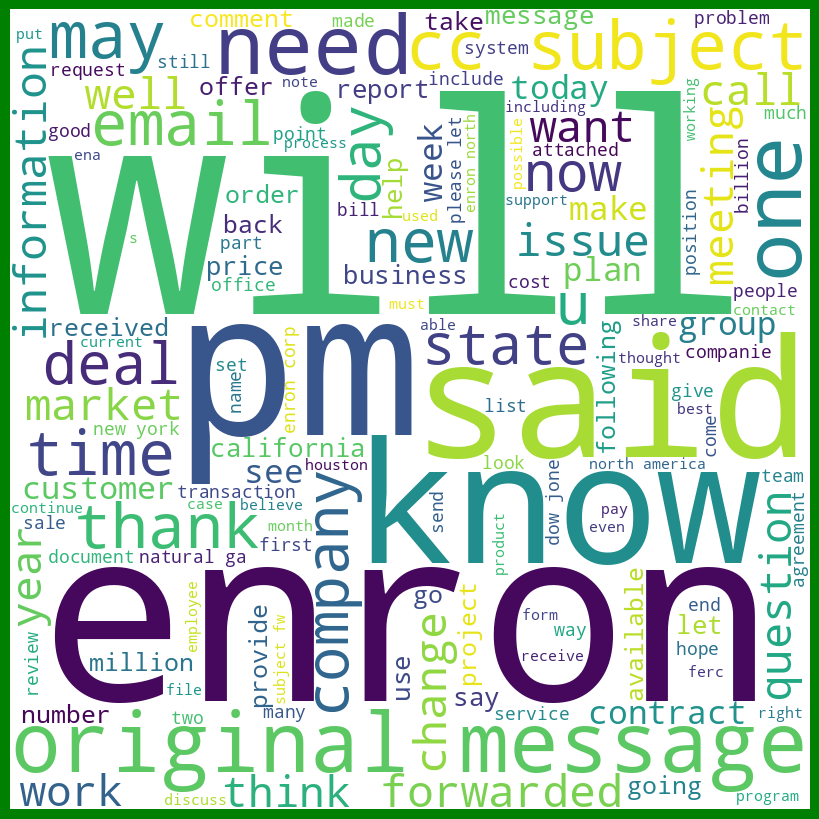

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

df_positive = sampled_df[sampled_df["Sentiment"]== "Positive"]
# iterate through the csv file
for val in df_positive.body_new:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = "green")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

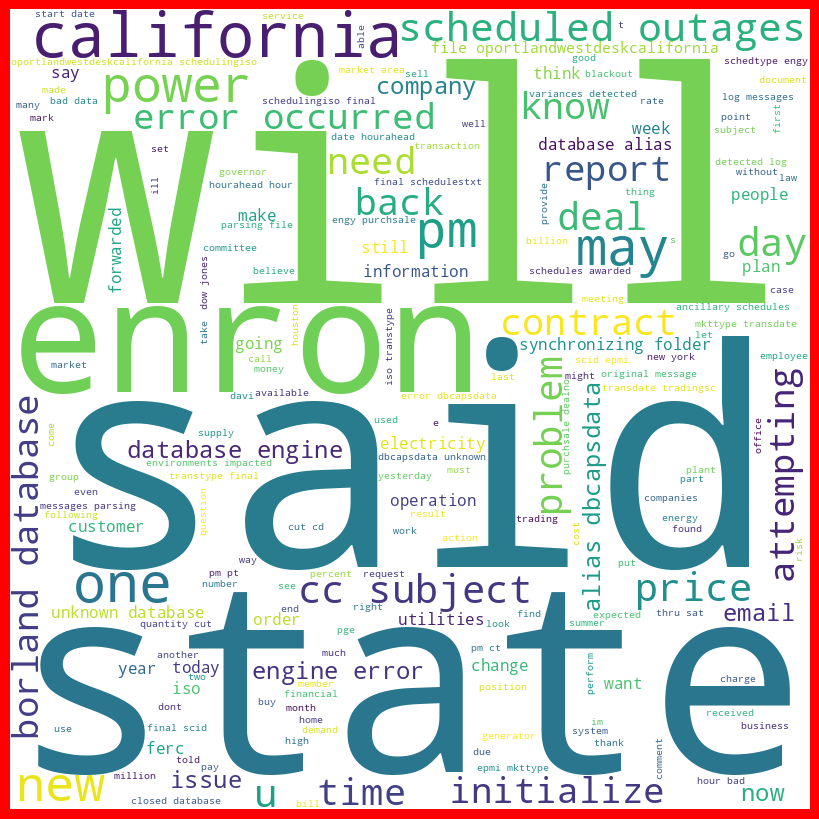

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

df_positive = sampled_df[sampled_df["Sentiment"]== "Negative"]
# iterate through the csv file
for val in df_positive.body_new:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = "red")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# **Advanced Sentiment Analysis**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob, Word, Blobber

In [ ]:
email = "I would love to meet you again"
TextBlob(email).sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [ ]:
# Applying on dataset
sampled_df['TB_score']= sampled_df.body_new.apply(lambda x: TextBlob(x).sentiment)
sampled_df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,body,user,Subject_new,body_new,description_lengths,scores,compound,Sentiment,temp_list,TB_score
427616,shackleton-s/sent/1912.,Message-ID: <21013688.1075844564560.JavaMail.e...,<21013688.1075844564560.JavaMail.evans@thyme>,2000-08-29 01:26:00-07:00,sara.shackleton@enron.com,william.bradford@enron.com,Re: Credit Derivatives,1.0,text/plain; charset=us-ascii,7bit,...,Bill: Thanks for the info. I also spoke wit...,shackleton-s,credit derivatives,bill thanks for the info i also spoke with ...,264,"{'neg': 0.036, 'neu': 0.801, 'pos': 0.163, 'co...",0.9851,Positive,"[bill, thanks, for, the, info, i, also, spoke,...","(0.12637844611528823, 0.42048872180451125)"
108773,farmer-d/logistics/1066.,Message-ID: <22688499.1075854130303.JavaMail.e...,<22688499.1075854130303.JavaMail.evans@thyme>,2000-04-24 05:43:00-07:00,pat.clynes@enron.com,aimee.lannou@enron.com,Meter #1591 Lamay Gaslift,1.0,text/plain; charset=us-ascii,7bit,...,"Aimee,\nPlease check meter #1591 Lamay gas lif...",farmer-d,meter lamay gaslift,aimee please check meter lamay gas lift it d...,32,"{'neg': 0.111, 'neu': 0.824, 'pos': 0.065, 'co...",-0.1531,Negative,"[aimee, please, check, meter, lamay, gas, lift...","(0.26, 0.26)"
355471,parks-j/deleted_items/202.,Message-ID: <27817771.1075841359502.JavaMail.e...,<27817771.1075841359502.JavaMail.evans@thyme>,2002-05-02 04:54:27-07:00,knipe3@msn.com,"fenner.chet@enron.com, joe.parks@enron.com, co...",Re: man night again?,1.0,text/plain; charset=us-ascii,7bit,...,GCCA Crawfish and rip-off raffle & over-priced...,parks-j,man night again,gcca crawfish and ripoff raffle overpriced pr...,537,"{'neg': 0.009, 'neu': 0.896, 'pos': 0.094, 'co...",0.9915,Positive,"[gcca, crawfish, and, ripoff, raffle, overpric...","(0.12270114942528734, 0.4801724137931035)"
457837,stokley-c/chris_stokley/iso/client_rep/41.,Message-ID: <10695160.1075858510449.JavaMail.e...,<10695160.1075858510449.JavaMail.evans@thyme>,2001-08-08 14:35:08-07:00,kalmeida@caiso.com,chris.stokley@enron.com,"Enron 480, 1480 charges",1.0,text/plain; charset=us-ascii,7bit,...,"<<Keoni.zip>> Chris, per your request here ar...",stokley-c,enron charges,keonizip chris per your request here are the ...,118,"{'neg': 0.05, 'neu': 0.883, 'pos': 0.068, 'com...",0.5106,Positive,"[keonizip, chris, per, your, request, here, ar...","(0.1875, 0.41875)"
124910,germany-c/all_documents/1174.,Message-ID: <27819143.1075853689038.JavaMail.e...,<27819143.1075853689038.JavaMail.evans@thyme>,2000-06-21 04:58:00-07:00,chris.germany@enron.com,thomas.engel@enron.com,Transport Deal,1.0,text/plain; charset=us-ascii,7bit,...,I'm trying to change the Receipt Meter on deal...,germany-c,transport deal,im trying to change the receipt meter on deal ...,36,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[im, trying, to, change, the, receipt, meter, ...","(0.0, 0.0)"


In [ ]:
sampled_df['TB_sentiment'] = sampled_df['body_new'].apply(lambda x: TextBlob(x).sentiment[0])
sampled_df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,user,Subject_new,body_new,description_lengths,scores,compound,Sentiment,temp_list,TB_score,TB_sentiment
427616,shackleton-s/sent/1912.,Message-ID: <21013688.1075844564560.JavaMail.e...,<21013688.1075844564560.JavaMail.evans@thyme>,2000-08-29 01:26:00-07:00,sara.shackleton@enron.com,william.bradford@enron.com,Re: Credit Derivatives,1.0,text/plain; charset=us-ascii,7bit,...,shackleton-s,credit derivatives,bill thanks for the info i also spoke with ...,264,"{'neg': 0.036, 'neu': 0.801, 'pos': 0.163, 'co...",0.9851,Positive,"[bill, thanks, for, the, info, i, also, spoke,...","(0.12637844611528823, 0.42048872180451125)",0.126378
108773,farmer-d/logistics/1066.,Message-ID: <22688499.1075854130303.JavaMail.e...,<22688499.1075854130303.JavaMail.evans@thyme>,2000-04-24 05:43:00-07:00,pat.clynes@enron.com,aimee.lannou@enron.com,Meter #1591 Lamay Gaslift,1.0,text/plain; charset=us-ascii,7bit,...,farmer-d,meter lamay gaslift,aimee please check meter lamay gas lift it d...,32,"{'neg': 0.111, 'neu': 0.824, 'pos': 0.065, 'co...",-0.1531,Negative,"[aimee, please, check, meter, lamay, gas, lift...","(0.26, 0.26)",0.260000
355471,parks-j/deleted_items/202.,Message-ID: <27817771.1075841359502.JavaMail.e...,<27817771.1075841359502.JavaMail.evans@thyme>,2002-05-02 04:54:27-07:00,knipe3@msn.com,"fenner.chet@enron.com, joe.parks@enron.com, co...",Re: man night again?,1.0,text/plain; charset=us-ascii,7bit,...,parks-j,man night again,gcca crawfish and ripoff raffle overpriced pr...,537,"{'neg': 0.009, 'neu': 0.896, 'pos': 0.094, 'co...",0.9915,Positive,"[gcca, crawfish, and, ripoff, raffle, overpric...","(0.12270114942528734, 0.4801724137931035)",0.122701
457837,stokley-c/chris_stokley/iso/client_rep/41.,Message-ID: <10695160.1075858510449.JavaMail.e...,<10695160.1075858510449.JavaMail.evans@thyme>,2001-08-08 14:35:08-07:00,kalmeida@caiso.com,chris.stokley@enron.com,"Enron 480, 1480 charges",1.0,text/plain; charset=us-ascii,7bit,...,stokley-c,enron charges,keonizip chris per your request here are the ...,118,"{'neg': 0.05, 'neu': 0.883, 'pos': 0.068, 'com...",0.5106,Positive,"[keonizip, chris, per, your, request, here, ar...","(0.1875, 0.41875)",0.187500
124910,germany-c/all_documents/1174.,Message-ID: <27819143.1075853689038.JavaMail.e...,<27819143.1075853689038.JavaMail.evans@thyme>,2000-06-21 04:58:00-07:00,chris.germany@enron.com,thomas.engel@enron.com,Transport Deal,1.0,text/plain; charset=us-ascii,7bit,...,germany-c,transport deal,im trying to change the receipt meter on deal ...,36,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[im, trying, to, change, the, receipt, meter, ...","(0.0, 0.0)",0.000000


In [ ]:
!pip install NRCLex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=f25d0f997b685703e5287562701da0638ef290093508465550d65b60f8e5fe10
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built NRCLex


In [ ]:
from nrclex import NRCLex
import nltk
nltk.download('punkt_tab')
email = NRCLex('Good work to the team')
#Return affect dictionary
print(email.affect_dict)
#Return raw emotional counts
print("\n",email.raw_emotion_scores)
#Return highest emotions
print("\n", email.top_emotions)
#Return affect frequencies
print("\n",email.affect_frequencies)

In [ ]:
def emotion(x):
    text = NRCLex(x)
    if text.top_emotions[0][1] == 0.0:
        return "No emotion"
    else:
        return text.top_emotions[0][0]
sampled_df['Emotion'] = sampled_df['body_new'].apply(emotion)
sampled_df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,Subject_new,body_new,description_lengths,scores,compound,Sentiment,temp_list,TB_score,TB_sentiment,Emotion
427616,shackleton-s/sent/1912.,Message-ID: <21013688.1075844564560.JavaMail.e...,<21013688.1075844564560.JavaMail.evans@thyme>,2000-08-29 01:26:00-07:00,sara.shackleton@enron.com,william.bradford@enron.com,Re: Credit Derivatives,1.0,text/plain; charset=us-ascii,7bit,...,credit derivatives,bill thanks for the info i also spoke with ...,264,"{'neg': 0.036, 'neu': 0.801, 'pos': 0.163, 'co...",0.9851,Positive,"[bill, thanks, for, the, info, i, also, spoke,...","(0.12637844611528823, 0.42048872180451125)",0.126378,positive
108773,farmer-d/logistics/1066.,Message-ID: <22688499.1075854130303.JavaMail.e...,<22688499.1075854130303.JavaMail.evans@thyme>,2000-04-24 05:43:00-07:00,pat.clynes@enron.com,aimee.lannou@enron.com,Meter #1591 Lamay Gaslift,1.0,text/plain; charset=us-ascii,7bit,...,meter lamay gaslift,aimee please check meter lamay gas lift it d...,32,"{'neg': 0.111, 'neu': 0.824, 'pos': 0.065, 'co...",-0.1531,Negative,"[aimee, please, check, meter, lamay, gas, lift...","(0.26, 0.26)",0.260000,positive
355471,parks-j/deleted_items/202.,Message-ID: <27817771.1075841359502.JavaMail.e...,<27817771.1075841359502.JavaMail.evans@thyme>,2002-05-02 04:54:27-07:00,knipe3@msn.com,"fenner.chet@enron.com, joe.parks@enron.com, co...",Re: man night again?,1.0,text/plain; charset=us-ascii,7bit,...,man night again,gcca crawfish and ripoff raffle overpriced pr...,537,"{'neg': 0.009, 'neu': 0.896, 'pos': 0.094, 'co...",0.9915,Positive,"[gcca, crawfish, and, ripoff, raffle, overpric...","(0.12270114942528734, 0.4801724137931035)",0.122701,positive
457837,stokley-c/chris_stokley/iso/client_rep/41.,Message-ID: <10695160.1075858510449.JavaMail.e...,<10695160.1075858510449.JavaMail.evans@thyme>,2001-08-08 14:35:08-07:00,kalmeida@caiso.com,chris.stokley@enron.com,"Enron 480, 1480 charges",1.0,text/plain; charset=us-ascii,7bit,...,enron charges,keonizip chris per your request here are the ...,118,"{'neg': 0.05, 'neu': 0.883, 'pos': 0.068, 'com...",0.5106,Positive,"[keonizip, chris, per, your, request, here, ar...","(0.1875, 0.41875)",0.187500,trust
124910,germany-c/all_documents/1174.,Message-ID: <27819143.1075853689038.JavaMail.e...,<27819143.1075853689038.JavaMail.evans@thyme>,2000-06-21 04:58:00-07:00,chris.germany@enron.com,thomas.engel@enron.com,Transport Deal,1.0,text/plain; charset=us-ascii,7bit,...,transport deal,im trying to change the receipt meter on deal ...,36,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[im, trying, to, change, the, receipt, meter, ...","(0.0, 0.0)",0.000000,fear


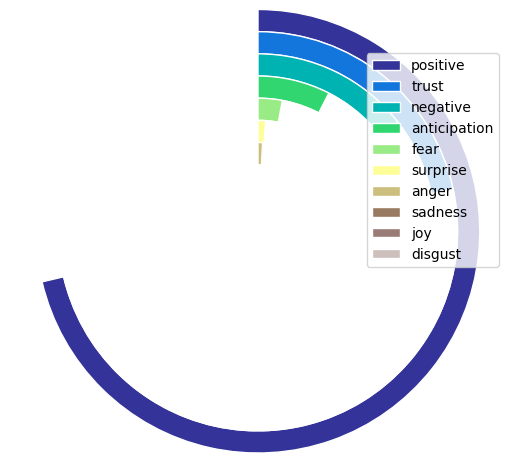

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

df_chart = sampled_df[sampled_df.Emotion != "No emotion"]
labels = df_chart.Emotion.value_counts().index.tolist()
data = df_chart.Emotion.value_counts()
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()

# **Conclusion:**


This project provided a comprehensive analysis of the Enron Email Dataset, uncovering valuable insights into email communication patterns, topics, and sentiment within the organization. Through **email network analysis**, we identified key influencers and communication trends, highlighting the scale-free nature of the network. **Text analysis**, including **topic modeling** and **sentiment analysis**, revealed the primary subjects of discussion and the emotional tone of communications, offering a deeper understanding of the organizational culture.

Data cleaning and processing ensured that the dataset was ready for analysis, resolving issues such as duplicates and date formatting. Overall, this project demonstrates how NLP techniques like **topic modeling**, **sentiment analysis**, and **social network analysis** can extract actionable insights from large, unstructured text data, which can be applied to various real-world business contexts for improving information management, strategic decision-making, and risk mitigation.